In [1]:
import scipy.integrate as intg
import scipy.interpolate as inp
from scipy.misc import derivative

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyval

In [2]:
import math
from CoolProp.CoolProp import PropsSI

In [3]:
def molal_to_massfr(m):
    M_LiCl = 42.394   
    x = m*M_LiCl/1000 / (m*M_LiCl/1000 + 1 )
    return x

In [4]:
def massfr_to_molal(x):
    M_LiCl = 42.394
    m = x/(M_LiCl/1000) / (1-x)
    return m

In [5]:
# relative mean square root error
def RMSRE(ref, sim):
    ref, sim = np.array(ref), np.array(sim)
    result = np.sqrt((((ref - sim)/ref) ** 2).mean())
    return result

## **thermodynamics**

### C_p

## h

### reference enthalpy @ 25°C

In [6]:
param_ramh = [-0.29955, -1.408417, 0.97913, -0.35007, 0.036087]

In [71]:
ramh = lambda m: param_ramh[0]*m**0.5 + param_ramh[1]*m**1 + param_ramh[2]*m**1.5 + param_ramh[3]*m**2 + param_ramh[4]*m**2.5

In [81]:
ramh(1)

-1.04282

23.5882436193801

In [72]:
rel_h = lambda m: ramh(m)*m # unit kJ/kg_water

In [73]:
rel_h(0.2)

-0.06828548781976107

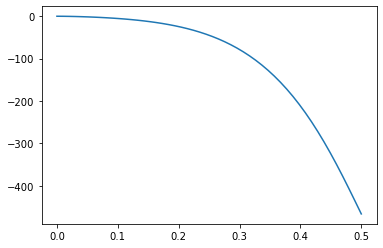

In [74]:
x_test = np.linspace(0, 0.5, num = 50, endpoint = True)
rel_h_test = [rel_h(massfr_to_molal(i)) for i in x_test]
plt.plot(x_test, rel_h_test)

In [44]:
delta_solution_unlimited = -445.64--408.701
delta_solution_unlimited
# find from NBS table!!!

-36.938999999999965

In [45]:
h_water = lambda T: PropsSI('H','T',T,'Q',0, 'IF97::Water')/1000 #kJ/kg

In [46]:
h_0_ref_25 = lambda m: delta_solution_unlimited * m + h_water(298.15) # kJ/kg_h2o ... input mol/kg

In [47]:
h_at_25_mol = lambda m: (h_0_ref_25(m) + rel_h(m))/(1+42.394/1000*m) # unit kJ/kg # # kJ/kg_mgcl2_aq ... input mol/kg

In [48]:
h_at_25_mass_frac = lambda x: h_at_25_mol(massfr_to_molal(x)) # unit kJ/kg

In [49]:
h_at_25_mass_frac(0)

104.83838586274732

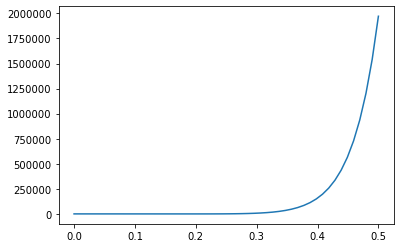

In [70]:
x_test = np.linspace(0, 0.5, num = 50, endpoint = True)
h_at_25_test = [h_at_25_mass_frac(i) for i in x_test]
plt.plot(x_test, h_at_25_test)

### $c_p$

In [51]:
param_cp = [1.4390, -1.24317, -0.12070, 0.12825, 0.62934, 58.5225, -105.6343, 47.7948]

In [52]:
f_1 = lambda x: (param_cp[0]*x + param_cp[1]*x**2 + param_cp[2] * x**3) if x <=0.31 else (param_cp[3] + param_cp[4]*x)

In [53]:
f_1(0.32)

0.3296388

In [54]:
f_2 = lambda T: param_cp[5]*(T/228-1)**0.02 + param_cp[6]*(T/228-1)**0.04 + param_cp[7]*(T/228-1)**0.06 

In [55]:
# water
para_wa = [88.7891, -120.1958, -16.9264, 52.4654, 0.10826, 0.46988]
cp_w = lambda theta: para_wa[0] + para_wa[1]*theta**0.02 + para_wa[2]*theta**0.04 + para_wa[3]*theta**0.06 + para_wa[4]*theta**1.8 + para_wa[5]*theta**8

In [56]:
cp = lambda T,x: cp_w(T/228-1)*(1-f_1(x)*f_2(T))

In [63]:
cp(292, 0.2)

3.2217797403503843

In [64]:
# simplified calculation of h: integration of Cp(T)dT
# function to get h from T and x  (enthalpy of dilution excluded...)
def get_h(xi, T_1, T_2):
    cp_T_ = lambda T: cp(T=T, x=xi)
    h = intg.quad(cp_T_, T_1, T_2)
    return h

In [65]:
def get_h_with_cp_and_ref_25(T, x):
    h_ref_25 = h_at_25_mass_frac(x)
    intgral_cp = get_h(xi = x, T_1=298.15, T_2=T)[0]
    h = h_ref_25 + intgral_cp
    return h

In [66]:
get_h_with_cp_and_ref_25(288.15 , 0.3)

6990.786877847062

In [67]:
0.3*42.394/(0.3*42.394 + 0.7*18.015)

0.5021260467374954

In [69]:
get_h_with_cp_and_ref_25(350, 0.24293713)

542.9565412569956

# MgCl2

In [ ]:
MgCl2 = -641.32 + 801.15
MgCl2